<a href="https://colab.research.google.com/github/2303A51670/ADM-Lab/blob/main/ADM_Lab04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [56]:
np.random.seed(42)
data = np.random.normal(0,1,100)
outliers = np.random.uniform(5,10,10)

In [57]:
print(data)

[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
  1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
  0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
 -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
 -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
 -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
  0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
 -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
  0.34361829 -1.76304016  0.32408397 -0.38508228 -0.676922    0.61167629
  1.03099952  0.93128012 -0.83921752 -0.30921238  0.33126343  0.97554513
 -0.47917424 -0.18565898 -1.10633497 -1.19620662  0.81252582  1.35624003
 -0.07201012  1.0035329   0.36163603 -0.64511975  0.36139561  1.53803657
 -0.03582604  1.56464366 -2.6197451   0.8219025   0.08704707 -0.29900735
  0.09176078 -1.98756891 -0.21967189  0.35711257  1

In [58]:
print(outliers)

[7.08705502 6.11053905 5.59932684 6.68807586 9.71454852 6.61601466
 7.59395311 8.51509479 6.81814801 9.85891041]


In [59]:
dff = pd.DataFrame(data)

In [60]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
dtypes: float64(1)
memory usage: 932.0 bytes


In [61]:
dff.describe()

,0
count,100.000000
mean,-0.103847
std,0.908168
min,-2.619745
25%,-0.600906
50%,-0.126956
75%,0.405952
max,1.852278


In [62]:
dff.isnull().sum()

,0
0,0


In [63]:
data_with_outliers = np.concatenate((data,outliers))

In [64]:
dff=pd.DataFrame(data_with_outliers,columns=['value'])

In [65]:
Q1 = dff['value'].quantile(0.25)
Q3 = dff['value'].quantile(0.75)
IQR = Q3-Q1
lower=Q1-1.5*IQR
upper=Q3+1.5*IQR


In [66]:
print(lower)
print(upper)

-2.5536973094649302
2.814223264213159


In [67]:
outliers_iqr=dff[(dff['value']<lower) | (dff['value']>upper)]
print(outliers_iqr)

        value
74  -2.619745
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549
105  6.616015
106  7.593953
107  8.515095
108  6.818148
109  9.858910


In [68]:
z_scores = stats.zscore(dff['value'])
outliers  = dff[np.abs(z_scores)>3]
print(outliers)

        value
104  9.714549
107  8.515095
109  9.858910


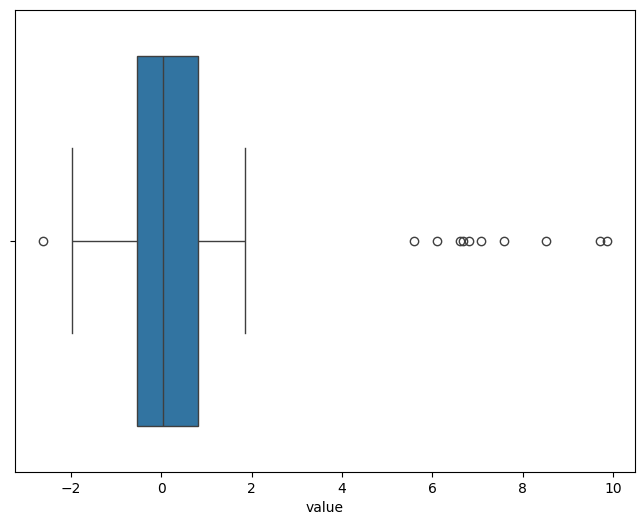

In [71]:
plt.figure(figsize=(8,6))
sns.boxplot(x=dff['value'])
plt.show()

In [76]:
dfcapped = dff.copy()
dfcapped['value'] = np.clip(dfcapped['value']>upper,upper,dfcapped['value'])
print(dfcapped)

        value
0    2.814223
1   -0.138264
2    2.814223
3    2.814223
4   -0.234153
..        ...
105  2.814223
106  2.814223
107  2.814223
108  2.814223
109  2.814223

[110 rows x 1 columns]


In [78]:
df_removed = dff.copy()
df_removed = df_removed.drop(outliers_iqr.index)
print(df_removed)

       value
0   0.496714
1  -0.138264
2   0.647689
3   1.523030
4  -0.234153
..       ...
95 -1.463515
96  0.296120
97  0.261055
98  0.005113
99 -0.234587

[99 rows x 1 columns]


In [79]:
df_imputed = dff.copy()
medain_value = df_imputed['value'].median()
df_imputed['value'].fillna(medain_value,inplace=True)
print(df_imputed)

        value
0    0.496714
1   -0.138264
2    0.647689
3    1.523030
4   -0.234153
..        ...
105  6.616015
106  7.593953
107  8.515095
108  6.818148
109  9.858910

[110 rows x 1 columns]


<ipython-input-79-6697fe2c7452>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed['value'].fillna(medain_value,inplace=True)


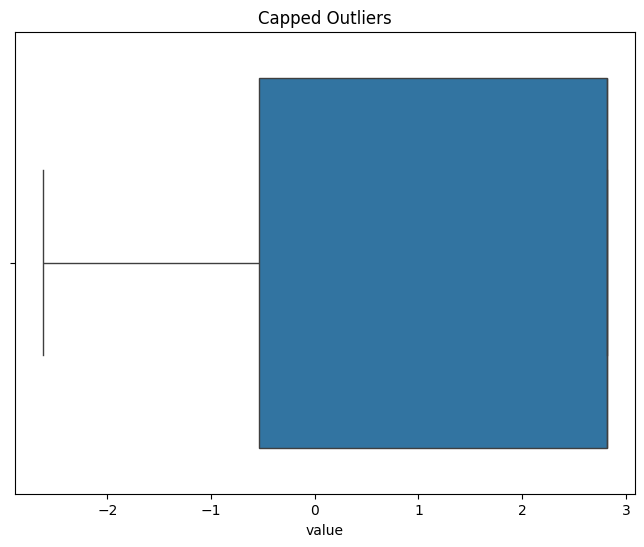

In [81]:
plt.figure(figsize=(8,6))
sns.boxplot(x=dfcapped['value'])
plt.title("Capped Outliers")
plt.show()


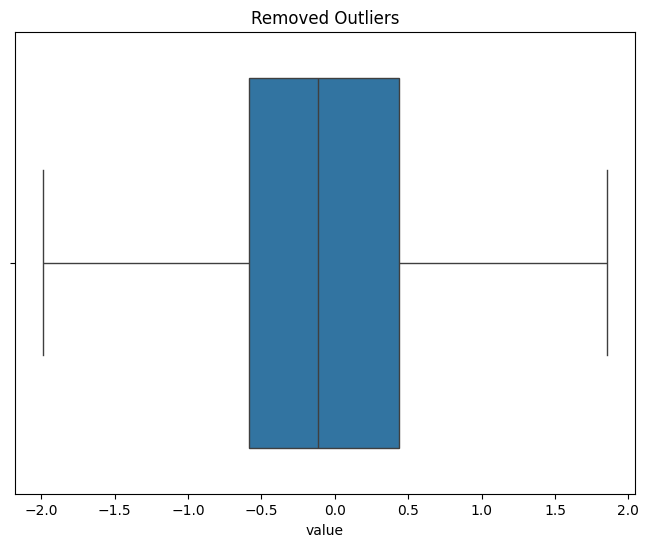

In [82]:
plt.figure(figsize=(8,6))
sns.boxplot(x=df_removed['value'])
plt.title("Removed Outliers")
plt.show()

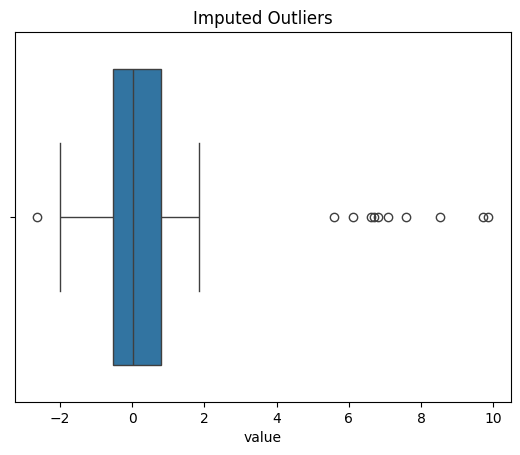

In [85]:
sns.boxplot(x=df_imputed['value'])
plt.title("Imputed Outliers")
plt.show()

In [88]:
print(f"Outliers detected using IQR:\n{outliers_iqr}")
print(f"Outliers detected using Z-score:\n{outliers}")



Outliers detected using IQR:
        value
74  -2.619745
100  7.087055
101  6.110539
102  5.599327
103  6.688076
104  9.714549
105  6.616015
106  7.593953
107  8.515095
108  6.818148
109  9.858910
Outliers detected using Z-score:
        value
104  9.714549
107  8.515095
109  9.858910
